In [2]:
from python_functions import django_initializer
from checkins.models import Lesson, Attendee

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Create Dataframes of Lessons and Attendees


In [14]:
lessons = pd.DataFrame(Lesson.objects.all().values())
attendees = pd.DataFrame(Attendee.objects.all().values())

#print(lessons.head())
print(attendees)

      id  user_id  lesson_id  checked_in
0      6       58          3       False
1      7        5          5       False
2      8        1          4       False
3     10       15          3       False
4     12        7          7       False
..   ...      ...        ...         ...
182  259        1        167       False
183  260       60        167       False
184  261       60        168       False
185  262       60        169       False
186  263       61        169       False

[187 rows x 4 columns]


In [16]:
lessons.rename(columns={'id':'lesson_id'}, inplace=True)
print(lessons)


     lesson_id                      time  class_type  schedule_id
0            1 2021-10-21 06:00:00+00:00  NoGi Class            1
1            2 2021-10-21 09:00:00+00:00  NoGi Class            1
2            3 2021-10-21 17:00:00+00:00  NoGi Class            1
3            4 2021-10-22 06:00:00+00:00    Gi Class            2
4            5 2021-10-22 11:00:00+00:00    Gi Class            2
..         ...                       ...         ...          ...
133        165 2021-12-28 18:00:00+00:00    Open Mat           85
134        166 2021-12-29 10:00:00+00:00    Open Mat           86
135        167 2021-12-30 18:00:00+00:00    Open Mat           87
136        168 2021-12-31 13:00:00+00:00    Open Mat           88
137        169 2022-01-03 10:00:00+00:00    Open Mat           89

[138 rows x 4 columns]


In [59]:
lesson_attendees = attendees.merge(lessons, on='lesson_id', how='left')

In [60]:
lesson_attendees['time'] = pd.to_datetime(lesson_attendees["time"])

In [61]:
lesson_attendees['time'] = lesson_attendees['time'].dt.strftime('%A %H:%M')
print(lesson_attendees)

      id  user_id  lesson_id  checked_in            time  class_type  \
0      6       58          3       False  Thursday 17:00  NoGi Class   
1      7        5          5       False    Friday 11:00    Gi Class   
2      8        1          4       False    Friday 06:00    Gi Class   
3     10       15          3       False  Thursday 17:00  NoGi Class   
4     12        7          7       False  Saturday 09:00  NoGi Class   
..   ...      ...        ...         ...             ...         ...   
182  259        1        167       False  Thursday 18:00    Open Mat   
183  260       60        167       False  Thursday 18:00    Open Mat   
184  261       60        168       False    Friday 13:00    Open Mat   
185  262       60        169       False    Monday 10:00    Open Mat   
186  263       61        169       False    Monday 10:00    Open Mat   

     schedule_id  
0              1  
1              2  
2              2  
3              1  
4              3  
..           ...  
18

<AxesSubplot:xlabel='Classes', ylabel='Frequency'>

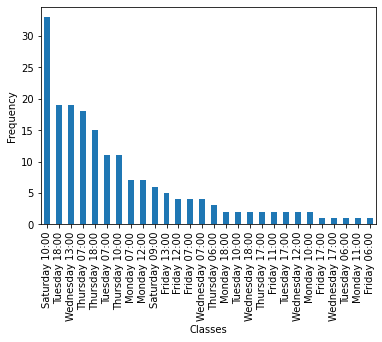

In [64]:
lesson_attendees['time'].value_counts().plot(kind='bar', xlabel='Classes', ylabel='Frequency')